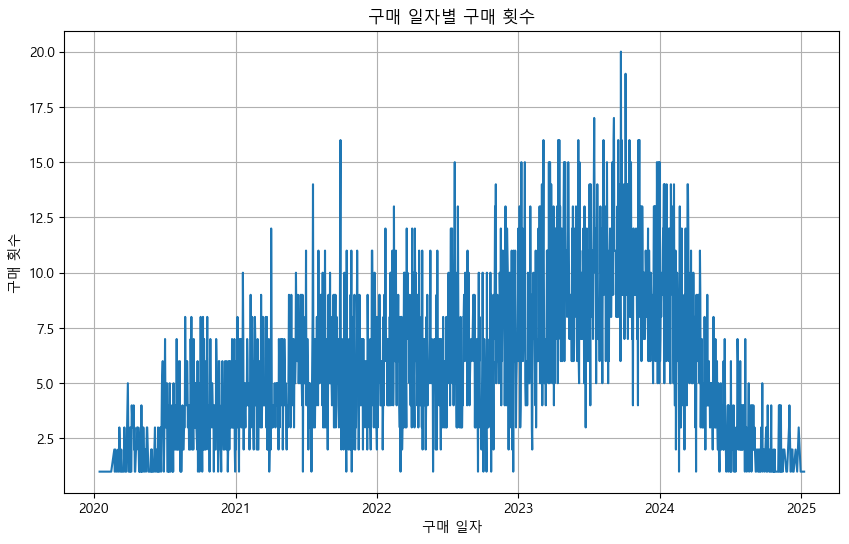

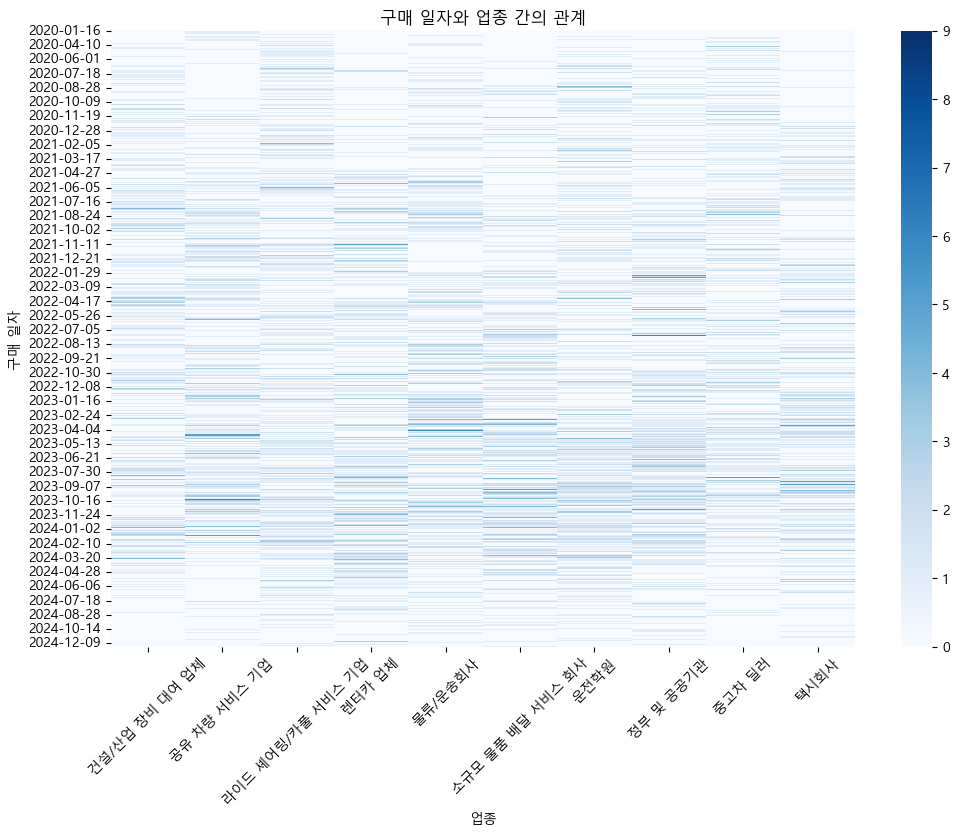

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 한글 폰트 설정
if platform.system() == 'Darwin':  # Mac OS
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
else:  # Linux 또는 기타
    plt.rc('font', family='NanumGothic')

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 불러오기
file_path = 'preprocessed_data.csv'  # CSV 파일 경로 입력
df = pd.read_csv(file_path)

# 구매 일자 열이 존재하는지 확인
if '구매 일자' in df.columns:
    # 구매 일자를 datetime 형식으로 변환
    df['구매 일자'] = pd.to_datetime(df['구매 일자'])

    # 꺾은선 그래프: 구매 일자별 구매 횟수
    purchase_counts = df['구매 일자'].dt.date.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    purchase_counts.plot(kind='line')
    plt.title('구매 일자별 구매 횟수')
    plt.xlabel('구매 일자')
    plt.ylabel('구매 횟수')
    plt.grid(True)
    plt.show()

    # 히트맵: 구매 일자와 업종 또는 지역 간의 관계
    if '업종' in df.columns:
        heatmap_data = df.groupby([df['구매 일자'].dt.date, '업종']).size().unstack(fill_value=0)
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, cmap='Blues', cbar=True)
        plt.title('구매 일자와 업종 간의 관계')
        plt.xlabel('업종')
        plt.ylabel('구매 일자')
        plt.xticks(rotation=45)
        plt.show()

    elif '지역' in df.columns:
        heatmap_data = df.groupby([df['구매 일자'].dt.date, '지역']).size().unstack(fill_value=0)
        plt.figure(figsize=(12, 8))
        sns.heatmap(heatmap_data, cmap='Greens', cbar=True)
        plt.title('구매 일자와 지역 간의 관계')
        plt.xlabel('지역')
        plt.ylabel('구매 일자')
        plt.xticks(rotation=45)
        plt.show()

    else:
        print("'업종' 또는 '지역' 열이 없습니다.")

else:
    print("'구매 일자' 열이 데이터프레임에 없습니다.")


증가 추세:
2020년 ~ 2022년 초: 전체적으로 구매 횟수가 증가하는 추세입니다.
최고치 도달:
2023년: 구매 횟수가 가장 높은 시기입니다. 이 시기에 특정 이벤트나 마케팅이 있었을 가능성이 높습니다.
감소 추세:
2024년 이후: 구매 횟수가 감소하는 추세입니다. 시즌 종료, 경제적 요인, 서비스 변화 등이 원인일 수 있습니다.

특정 업종에서의 주요 활동 시기:
특정 업종(예: "공유 차량 서비스"와 "소규모 물류 배송 서비스")에서 특정 날짜에 구매가 집중되는 경향이 보입니다.
주요 이벤트 가능성:
동일 업종 내 특정 날짜에 구매가 집중된 시기는 이벤트나 프로모션 때문일 수 있습니다.
다양한 업종 활동:
전반적으로 구매가 고르게 발생했지만, 특정 업종은 한정된 시기에 집중적으로 활동하는 경향을 보입니다.

꺾은선 그래프를 통해 전체적으로 구매 트렌드를 파악할 수 있으며, 2023년을 정점으로 구매가 감소하고 있습니다.
히트맵을 통해 업종별 주요 활동 시기를 분석할 수 있으며, 특정 업종은 특정 날짜에 집중된 구매 활동을 보이는 경우가 많습니다.
이러한 데이터는 시즌별 프로모션 계획, 서비스 개선 등 전략 수립에 활용될 수 있습니다.